# 🎓 Proyecto: Estadística para Data Science

¡Bienvenido al reto final!

Este proyecto tiene como objetivo integrar y aplicar todas las habilidades estadísticas adquiridas durante el curso. El trabajo se divide en 4 partes:

1.  **Análisis Descriptivo (Dataset Libre):** Exploración profunda de un dataset de tu elección.
2.  **Inferencia y Modelado (Dataset Libre):** Análisis de relaciones y predicción sobre tus datos.
3.  **Regresión Lineal "From Scratch" (NumPy):** Implementación técnica de una regresión lineal simple usando solo matemáticas y NumPy.
4.  **Series Temporales:** Análisis de tendencia y estacionalidad en datos simulados.

---

###  Instrucciones Previas
Antes de comenzar, busca un dataset en [Kaggle](https://www.kaggle.com/) o una fuente confiable. Idealmente, debe tener:
*   Al menos 5 variables (numéricas y categóricas).
*   Un número razonable de filas (+1000).
*   Una variable numérica clara que te gustaría predecir (Target/Y).

**Justificación de decisiones**
* Cada elección relevante (dataset, variables, métricas, supuestos estadísticos, etc.) debe estar brevemente justificada desde un punto de vista estadístico.

**Validación de supuestos**
* Siempre que se aplique un modelo o técnica estadística, se deberán comprobar explícitamente sus supuestos (normalidad, independencia, homocedasticidad, linealidad, estacionariedad, etc., según corresponda).

**Interpretación de resultados**
* No basta con calcular estadísticas o ajustar modelos: los resultados deben ser interpretados en lenguaje claro, conectándolos con el contexto de los datos.

**Reproducibilidad**
* El trabajo debe ser completamente reproducible: cualquier persona debería poder ejecutar el código y obtener los mismos resultados sin modificaciones manuales.


## PARTE 1: Análisis Descriptivo (Dataset Propio)

**Objetivo:** Comprender la naturaleza de tus datos antes de modelar.

**Requisitos:**
1.  **Carga y Vista General:** Importa pandas, carga tu CSV y muestra las primeras filas, info y tipos de datos.
2.  **Clasificación de Variables:** Identifica explícitamente cuáles son Nominales, Ordinales, Discretas y Continuas.
3.  **Estadísticos Descriptivos:** Usa `.describe()` e interpreta la media vs mediana (¿Hay sesgo?).
4.  **Detección de Outliers:** Identifica valores atípicos en tus variables numéricas usando Boxplots y el criterio del Rango Intercuartílico (IQR).
5.  **Visualización de Distribuciones:** Plotea histogramas para tus variables principales.

**Conclusión:** Escribe un breve párrafo resumiendo la calidad de tus datos (¿Hay nulos? ¿Outliers? ¿Sesgo?).

-------

**Amplia el analisis:**

- **Análisis de valores nulos**  
  Identifica la cantidad y el porcentaje de valores nulos por variable. Reflexiona brevemente sobre si su presencia parece aleatoria o estructural.

- **Comparación entre variables numéricas**  
  Selecciona al menos dos variables numéricas y analiza si presentan escalas o rangos muy distintos, comentando posibles implicaciones para futuros modelos.

  También se debe valorar como son los valores de las diferentes metricas para diferentes categorías dentro de tu data set. ej Diferencias por genero, edad, zona geográfica ...

- **Asimetría y curtosis**  
  Calcula la asimetría (skewness) de al menos una variable numérica e interpreta su relación con la forma observada en el histograma.

- **Outliers: impacto potencial**  
  Para una variable con outliers detectados, discute brevemente cómo podrían afectar al análisis inferencial o a un modelo predictivo posterior.

- **Calidad global del dataset**  
  Amplía la conclusión final incorporando una valoración general de si el dataset está “listo para modelar” o si requeriría una fase adicional de limpieza y transformación.

### <span style="color: #66ccff; font-weight: bold;" > 1. Carga y Vista general </span>

Carga de datos y de todas las librerías necesarias

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')

# 1. Cargar datos de la NBA
df = pd.read_csv('nba_players.csv')


Comprobamos el nombre de las columnas del dataset.

In [2]:
df.columns

Index(['season', 'lg', 'player', 'player_id', 'age', 'team', 'pos', 'g', 'gs',
       'mp', 'fg', 'fga', 'fg_percent', 'x3p', 'x3pa', 'x3p_percent', 'x2p',
       'x2pa', 'x2p_percent', 'e_fg_percent', 'ft', 'fta', 'ft_percent', 'orb',
       'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'trp_dbl'],
      dtype='object')

Hay algunos nombres que están demasiado simplificados, se modifican para clarificar la visualización de datos

In [3]:
df = df.rename(columns = {'lg' : 'league', 'pos' : 'position', 'g' : 'games', 'gs' : 'games_started', 'mp' : 'minutes_played', 
                                 'fg':'field_goals', 'fga':'field_goals_attempts', 'fg_percent': 'field_goals_percent', 'x3p':'3p', 'x3pa':'3p_attempts', 
                                 'x3p_percent':'3p_percent', 'x2p':'2p','x2pa':'2p_attempts', 'x2p_percent':'2p_percent', 'e_fg_percent': 'effective_percent', 
                                 'ft':'Free_Throws', 'fta':'Free_Throws_Attempts', 'orb':'offensive_rebounds', 'drb':'deffensive_rebounds', 
                                 'trb':'total_rebounds', 'ast':'assists', 'stl':'steals', 'blk':'blocks', 'tov':'turnovers',
                                 'pf':'personal_fouls', 'pts':'points'})

Aquí podemos ver como quedarían las columnas modificadas.

In [4]:
df.columns

Index(['season', 'league', 'player', 'player_id', 'age', 'team', 'position',
       'games', 'games_started', 'minutes_played', 'field_goals',
       'field_goals_attempts', 'field_goals_percent', '3p', '3p_attempts',
       '3p_percent', '2p', '2p_attempts', '2p_percent', 'effective_percent',
       'Free_Throws', 'Free_Throws_Attempts', 'ft_percent',
       'offensive_rebounds', 'deffensive_rebounds', 'total_rebounds',
       'assists', 'steals', 'blocks', 'turnovers', 'personal_fouls', 'points',
       'trp_dbl'],
      dtype='object')

Comprobamos el número de registros y columnas de los que dispone inicialmente el dataset

In [5]:
df.shape

(33119, 33)

Filtramos datos para que sólo aparezcan jugadores de la liga NBA y que hayan jugado un mínimo de 500 minutos, para obtener datos con un mínimo de relevancia.

In [6]:
df = df[(df['league'] == 'NBA' ) & (df['minutes_played'] >= 500)]
df.shape

(20167, 33)

Observamos que todavía es un valor de registros demasiado alto, por tanto, nos deshacemos de algunas columnas que creemos que aportan una información poco relevante para este estudio.

In [7]:
cleaning = df.drop(columns=['season','league','player_id', 'age', 'team', 'games_started'], errors='ignore')

Se crea un conjunto de las variables consideradas más importantes para el estudio, casi todas ellas numéricas. <br>
-   Variables nominales que aportan información básica como son el nombre y la posición del jugador.
-   Variables como el número de partidos o de minutos disputados por cada jugador, se resumen en una suma de todos los registros.
-   Variables como los porcentajes, se utiliza una media de todos los registros para obtener un dato usable que represente más o menos la carrera del jugador.

In [8]:
important_data = cleaning.groupby('player').agg({
    'player':'first',
    'position':'first',
    'games':'sum',
    'minutes_played':'sum',
    'total_rebounds':'sum',
    'assists':'sum',
    'steals': 'sum',
    'blocks': 'sum',
    'turnovers': 'sum',
    'personal_fouls': 'sum',
    'points': 'sum',
    'trp_dbl': 'sum',
    'field_goals_percent': 'mean',
    '3p_percent': 'mean',
    '2p_percent': 'mean',
    'effective_percent': 'mean',
    'ft_percent': 'mean'
}).round(4)

Una vez ejecutada con éxito esta agrupación de datos relevantes, vemos que se reduce considerablemente el número de registros y podemos centrarnos en los datos que nos importan.

In [9]:
important_data.shape

(2998, 17)

El siguiente ajuste que hay que hacer, es el del tipo de datos, que observamos con la función info.

In [10]:
important_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, A.C. Green to Željko Rebrača
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               2998 non-null   object 
 1   position             2998 non-null   object 
 2   games                2998 non-null   int64  
 3   minutes_played       2998 non-null   float64
 4   total_rebounds       2998 non-null   float64
 5   assists              2998 non-null   int64  
 6   steals               2998 non-null   float64
 7   blocks               2998 non-null   float64
 8   turnovers            2998 non-null   float64
 9   personal_fouls       2998 non-null   float64
 10  points               2998 non-null   int64  
 11  trp_dbl              2998 non-null   float64
 12  field_goals_percent  2998 non-null   float64
 13  3p_percent           2326 non-null   float64
 14  2p_percent           2404 non-null   float64
 15  effective_percent    240

Se observa que hay algunos datos con un tipo erróneo o no apropiado, no tiene mucho sentido que el número total de minutos jugados sea de tipo float o igual con el número de rebotes y otras columnas, por tanto, procedemos a modificar los tipos de datos que se consideran inapropiados en algunas de las columnas.

In [11]:
columnas = ['minutes_played', 'total_rebounds', 'steals', 'blocks', 'turnovers', 'personal_fouls','trp_dbl']

for col in columnas:
    important_data[col] = important_data[col].fillna(0).astype('int64')

Ahora confirmamos que las columnas tienen el tipo de dato correcto

In [12]:
important_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, A.C. Green to Željko Rebrača
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               2998 non-null   object 
 1   position             2998 non-null   object 
 2   games                2998 non-null   int64  
 3   minutes_played       2998 non-null   int64  
 4   total_rebounds       2998 non-null   int64  
 5   assists              2998 non-null   int64  
 6   steals               2998 non-null   int64  
 7   blocks               2998 non-null   int64  
 8   turnovers            2998 non-null   int64  
 9   personal_fouls       2998 non-null   int64  
 10  points               2998 non-null   int64  
 11  trp_dbl              2998 non-null   int64  
 12  field_goals_percent  2998 non-null   float64
 13  3p_percent           2326 non-null   float64
 14  2p_percent           2404 non-null   float64
 15  effective_percent    240

In [14]:
important_data = important_data.reset_index(drop=True)
important_data.sample(10)

,player,position,games,minutes_played,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,trp_dbl,field_goals_percent,3p_percent,2p_percent,effective_percent,ft_percent
2436,Rodrick Rhodes,SF,58,1070,70,110,62,10,97,125,337,0,0.3670,0.2500,0.3700,0.3700,0.6170
2246,Paul Griffin,PF,457,9594,2555,1062,383,240,598,1333,2355,0,0.5083,NaN,0.5270,0.5270,0.6912
2961,Winston Garland,PG,590,15153,1647,2724,752,90,1133,1403,5373,2,0.4228,0.2902,0.4320,0.4324,0.8347
1946,Mario Hezonja,PF,330,6107,1026,415,243,80,371,549,2284,1,0.4128,0.3138,0.4778,0.4764,0.8206
1300,James Edwards,C,1179,30825,6746,1597,471,951,2128,4286,16246,0,0.4888,0.0455,0.4962,0.4954,0.6879
2064,Mike Davis,SG,191,4015,435,346,0,0,0,535,2066,0,0.4263,NaN,NaN,NaN,0.7677
1699,Kenny Gattison,PF,471,9509,2251,427,283,312,580,1353,3797,0,0.5170,0.2000,0.5187,0.5173,0.6451
410,Cal Bowdler,PF,52,585,110,11,18,15,11,64,162,0,0.3510,0.2000,0.3550,0.3530,0.8300
1733,Kevin Lynch,SG,55,819,85,83,37,9,44,107,224,0,0.4170,0.3750,0.4190,0.4240,0.7610
1816,Larry McNeill,PF,299,5691,1543,261,191,86,127,763,2800,0,0.4684,NaN,NaN,NaN,0.7822


Queremos saber que cantidad de nulos existen por columna, y si hay alguna columna que debamos considerar si tiene sentido o no su existencia

In [15]:
null_count = important_data.isnull().sum()
print(null_count)


player                   0
position                 0
games                    0
minutes_played           0
total_rebounds           0
assists                  0
steals                   0
blocks                   0
turnovers                0
personal_fouls           0
points                   0
trp_dbl                  0
field_goals_percent      0
3p_percent             672
2p_percent             594
effective_percent      594
ft_percent               0
dtype: int64


Y esto en porcentaje se aplica...

In [16]:
null_percentage = (important_data.isnull().sum() / len(important_data)) * 100
print(null_percentage)

player                  0.000000
position                0.000000
games                   0.000000
minutes_played          0.000000
total_rebounds          0.000000
assists                 0.000000
steals                  0.000000
blocks                  0.000000
turnovers               0.000000
personal_fouls          0.000000
points                  0.000000
trp_dbl                 0.000000
field_goals_percent     0.000000
3p_percent             22.414943
2p_percent             19.813209
effective_percent      19.813209
ft_percent              0.000000
dtype: float64


ACLARACIÓN: La existencia de estos nulos tiene una explicación, hasta 1979 no se empezaron a contar como 3 puntos desde la distancia que se considera actualmente, por tanto los jugadores que jugaron en años anteriores no pueden tener este porcentaje y puede que 'manipule' un poco los datos, por eso, mejor eliminar del dataset a estos jugadores para poder hacer un análisis con el 100% de los registros completado sin valores nulos para sacar unas conclusiones más claras.

In [17]:
# Eliminamos los registros con nulos en '3p_percent'
important_data.dropna(subset=['3p_percent'], inplace=True)

Actualizamos info

In [18]:
null_percentage = (important_data.isnull().sum() / len(important_data)) * 100
print(null_percentage)

player                 0.0
position               0.0
games                  0.0
minutes_played         0.0
total_rebounds         0.0
assists                0.0
steals                 0.0
blocks                 0.0
turnovers              0.0
personal_fouls         0.0
points                 0.0
trp_dbl                0.0
field_goals_percent    0.0
3p_percent             0.0
2p_percent             0.0
effective_percent      0.0
ft_percent             0.0
dtype: float64


Por aclarar un poco el dataset, se hace una descripción de las posibles posiciones que pueden tener los jugadores de la NBA, esto nos será útil después en algunas consultas.

In [20]:
# Diferentes posiciones en la NBA
posiciones_limpias = important_data['position'].dropna().unique()
print(posiciones_limpias)

['PF' 'SG' 'PG' 'SF' 'C']


Especificación de la información de las columnas de la tabla obtenida
- POSITION. Diferentes posiciones que pueden ocupar los jugadores en la NBA.
    -   C  - Center         - Pívot
    -   PF - Power Forward  - Ala-Pívot
    -   SF - Small Forward  - Alero
    -   SG - Shooting Guard - Escolta
    -   PG - Point Guard    - Base       
- GAMES. Cantidad total de partidos que acumula cada jugador en su carrera en la NBA. 
- MINUTES_PLAYED. Minutos totales jugados por cada jugador en su carrera.
- TOTAL_REBOUNDS. Número total de rebotes ganados por cada jugador, tanto defensivos como ofensivos.
- ASSISTS. Asistencias acumuladas por cada jugador.
- STEALS. Robos de cada jugador en su carrera.
- BLOCKS. Total de bloqueos bien ejecutados. 
- TURNOVERS. Pérdidas de balón de cada jugador. 
- PERSONAL_FOULS. Faltas personales realizadas por cada jugador.
- POINTS. Suma de la cantidad de puntos anotados por cada jugador a lo largo de la carrera.
- TRP_DBL. Cantidad de triple-dobles conseguidos por cada jugador, en caso de que hayan hecho alguno.
- FIELD_GOALS_PERCENT. Cantidad de tiros de campo ejecutados por cada jugador.
- 3P_PERCENT. Porcentaje de acierto de tiros de campo de 3 puntos.
- 2P_PERCENT. Porcentaje de acierto de tiros de campo de 2 puntos.
- EFFECTIVE_PERCENT. Porcentaje de efectividad total de tiros de campo de cada jugador en su carrera.
- FT_PERCENT. Porcentaje de tiros libres anotados por cada jugador a lo largo de su carrera.

### <span style="color: #66ccff; font-weight: bold;" > 2. Clasificación de las variables </span>

El primer paso de cualquier análisis es entender la naturaleza de los atributos

<span style='font-weight: bold'> VARIABLES CUALITATIVAS </span>
1.  **Nominales:** Sin orden implícito. <br>
POSITION<br><br>
2.  **Ordinales:** Existe una jerarquía clara.

<span style='font-weight: bold'> VARIABLES CUANTITATIVAS </span>
1.  **Discretas:** Valores contables y finitos.<br>
GAMES, MINUTES_PLAYED, TOTAL_REBOUNDS, ASSISTS, STEALS, BLOCKS, TURNOVERS, PERSONAL_FOULS, POINTS, TRP_DBL <br><br>
2.  **Contínuas:** Valores infinitos dentro de un rango.<br>
FIELD_GOALS_PERCENT, 3P_PERCENT, 2P_PERCENT, EFFECTIVE_PERCENT, FT_PERCENT

### <span style="color: #66ccff; font-weight: bold;" > 3. Estadísticos Descriptivos </span>
Media vs Mediana ¿Hay sesgo?

In [22]:
describe = important_data.describe()

Función para visualizar mejor la comparativa entre la media y la mediana obtenidas con la función describe

In [23]:
def highlight_mean_median(s):
    idx = s.index 
    colors = ['background-color: grey' if isinstance(row, str) and ('mean' in row or '50%' in row) else '' for row in idx]
    return pd.Series(colors, index=idx)

grey_dates = describe.style.apply(highlight_mean_median, axis=0)
grey_dates

,games,minutes_played,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,trp_dbl,field_goals_percent,3p_percent,2p_percent,effective_percent,ft_percent
count,2326.000000,2326.000000,2326.000000,2326.000000,2326.000000,2326.000000,2326.000000,2326.000000,2326.000000,2326.000000,2326.000000,2326.000000,2326.000000,2326.000000,2326.000000
mean,460.248925,11702.318143,2087.497850,1154.754084,388.885641,238.935082,698.822012,1048.450129,5101.958727,1.243766,0.454238,0.256816,0.485448,0.492218,0.739815
std,351.876127,10999.120540,2400.649975,1551.359411,417.701981,380.551234,751.751028,935.249264,5661.040539,8.671763,0.052200,0.134443,0.055847,0.049301,0.088531
min,19.000000,500.000000,29.000000,11.000000,6.000000,0.000000,8.000000,28.000000,93.000000,0.000000,0.293000,0.000000,0.260000,0.335000,0.300000
25%,149.000000,2555.500000,386.500000,175.000000,78.250000,30.000000,139.000000,256.250000,914.500000,0.000000,0.420000,0.167000,0.451000,0.460900,0.692175
50%,390.500000,8259.000000,1288.000000,556.000000,243.000000,103.500000,431.000000,790.000000,3080.000000,0.000000,0.449000,0.301350,0.479200,0.488900,0.751600
75%,717.750000,18084.250000,2861.500000,1538.750000,581.750000,279.000000,1019.750000,1604.750000,7360.250000,0.000000,0.481500,0.352800,0.513000,0.518900,0.800000
max,2032.000000,59041.000000,17440.000000,15806.000000,3265.000000,3830.000000,5471.000000,4985.000000,42184.000000,211.000000,0.787000,1.000000,0.800000,0.787000,1.000000


Como se puede apreciar en los resultados obtenidos en la tabla, concretamente en las 2 filas señaladas con color, la media y la mediana (50%) reflejan dos tipos de resultados
-   **Datos discretos** En este tipo de datos se da que la media tiene un valor mucho más alto que la mediana, esto es porque hay un porcentaje de jugadores con valores muy altos que provocan que la media suba pero que no representa el valor medio por jugador, por tanto podemos decir que no sería un valor representativo. 
<br><br>
-   **Datos porcentuales** Sin embargo en los valores de porcentaje, se encuentran mucho más cerca la media y la mediana, porque estamos cogiendo los valores centrales y son unos datos mucho más representativos.
<br><br>

Podríamos decir que hay sesgo sobre todo en los datos discretos, donde la media >> mediana, sin embargo en los datos porcentuales nos encontramos con media < mediana, con una diferencia mucho más suave.

En las gráficas de los siguientes ejercicios vamos a poder de forma más clara la visualización de estas comparaciones

### <span style="color: #66ccff; font-weight: bold;" > 4. Detección de Outliers </span>

Identificación de valores atípicos en tus variables numéricas usando Boxplots y el criterio del Rango Intercuartílico (IQR)

Diagrama de bigotes de la variable POINTS, que representa la suma de puntos anotados por los jugadores a lo largo de toda su carrera en la NBA

Text(0.5, 0, 'Puntos anotados')

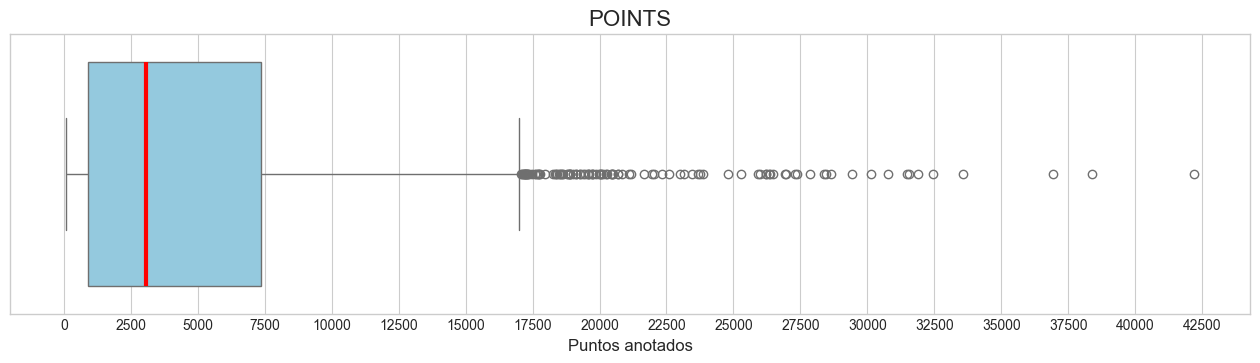

In [24]:
plt.figure(figsize=(16, 8))

# 1. Boxplot para variable Puntos
plt.subplot(2, 1, 1)
sns.boxplot(x=important_data['points'], color='skyblue', 
            medianprops={'color': 'red', 'linewidth': 3, 'linestyle': '-'})
plt.title('POINTS', fontsize=16)

# AJUSTE DE ESCALA PARA PUNTOS: Marcas cada 2500
max_pts = important_data['points'].max()
plt.xticks(np.arange(0, max_pts + 2500, 2500)) 
plt.xlabel('Puntos anotados', fontsize=12)

#### Análisis
-   La línea roja representa la mediana, es decir, el 50% de los jugadores evaluados han anotado poco más de 2500 puntos en su carrera. Como se puede observar está muy desplazada a la izquierda, por lo que se confirma que la mayoría de jugadores no llegan a unas cifras de anotación tan altas como las que refleja la media de tiros.
-   La caja azul representa el rango intercuartílico, que se ve bastante amplio, y que engloba desde Q1 (unos 500 puntos) a Q3 (cerca de 7500), estos datos representan la masa central de los jugadores.
-   Los bigotes y los círculos representan lo que se consideran los límites de los datos normales, fuera de ellos, se encuentran los outliers, que representan datos anómalos, en este caso, datos de superestrellas que han conseguido anotar muchos más puntos de los que han anotado buenos jugadores a lo largo de toda su carrera.

Para ilustrar con un ejemplo de qué tipo de jugadores estamos hablando, vamos a hacer una consulta para ojear el top 10 de anotadores en la historia de la NBA

In [25]:

top_10_scorers = important_data.sort_values(by='points', ascending=False).head(10)
top_10_display = top_10_scorers[['player', 'points']]
print("--- TOP 10 MÁXIMOS ANOTADORES (HISTORIA NBA) ---")
print(top_10_display.to_string(index=False))

--- TOP 10 MÁXIMOS ANOTADORES (HISTORIA NBA) ---
             player  points
       LeBron James   42184
Kareem Abdul-Jabbar   38387
        Karl Malone   36928
        Kobe Bryant   33560
       Kevin Durant   32444
     Michael Jordan   31884
      Dirk Nowitzki   31560
      Eddie Johnson   31490
       James Harden   30788
    Carmelo Anthony   30125


Diagrama de bigotes que representa la variable EFFECTIVE_PERCENT, que representa la media de porcentaje de efectividad que han acumulado los jugadores a lo largo de su carrera

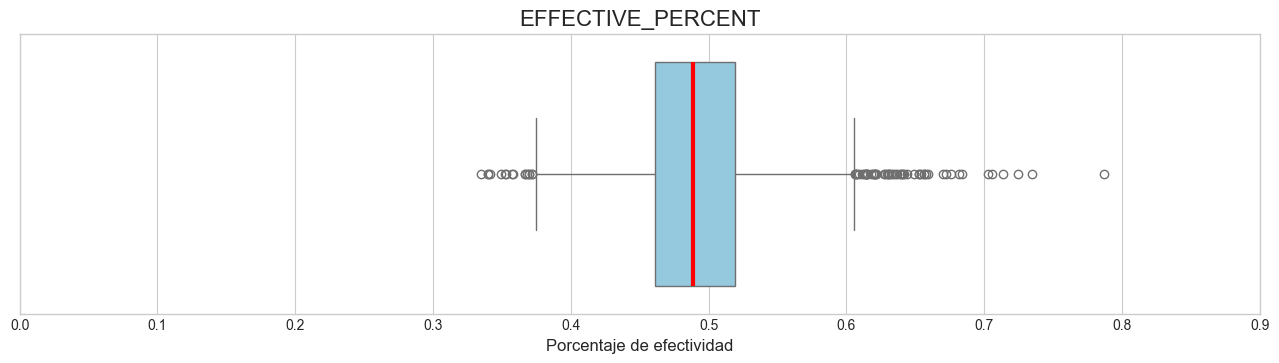

In [27]:
plt.figure(figsize=(16, 8))

# 2. Boxplot para % Efectivo (Abajo)
plt.subplot(2, 1, 2)
sns.boxplot(x=important_data['effective_percent'], color='skyblue', 
            medianprops={'color': 'red', 'linewidth': 3, 'linestyle': '-'})
plt.title('EFFECTIVE_PERCENT', fontsize=16)

# AJUSTE DE ESCALA PARA %: Marcas cada 0.1
plt.xticks(np.arange(0, 1.0, 0.1)) 
plt.xlabel('Porcentaje de efectividad', fontsize=12)
plt.show()

#### Análisis
-   La mediana está prácticamente en el centro de la caja azul. Por tanto, se confirma lo que hablábamos en el ejercicio anterior de que la media y la mediana prácticamente coinciden, porque los datos no están estirados hacia ningún lado.
-   Los bigotes se extienden desde casi 0.4 más o menos hasta 0.61, cualquier jugador dentro de este rango es considerado normal respecto a la efectividad de anotación con respecto a sus tiros de campo. 
-   Los outliers de la parte izquierda de la gráfica tienen un porcentaje de anotación muy bajo, se debe tratar de jugadores con otro tipo de especialidades defensivas que no implican tener un peso importante en la anotación del equipo.
-   Los outliers de la parte derecha, llegan a un porcentaje de anotación extremadamente alto, lo que no implica que sean los mismos jugadores que destacaron en la gráfica anterior pues puede tratarse de jugadores altos que solamente tiran desde debajo de la canasta y tienen muy poco porcentaje de fallo


No obstante, vamos a realizar un par de búsquedas informativas para salir de dudas y matar la curiosidad.

En primer lugar, queremos conocer el top 10 de jugadores con el porcentaje de anotación más bajo.

In [28]:
bottom_10_efficiency = important_data.sort_values(by='effective_percent', ascending=True).head(10)
bottom_10_display = bottom_10_efficiency[['player', 'effective_percent','games','assists','total_rebounds']]
print("--- TOP 10 JUGADORES CON MENOR EFICIENCIA (% EFECTIVO) ---")
print(bottom_10_display.to_string(index=False))

--- TOP 10 JUGADORES CON MENOR EFICIENCIA (% EFECTIVO) ---
              player  effective_percent  games  assists  total_rebounds
        Theron Smith              0.335     33       28             116
Nikoloz Tskitishvili              0.340     81       91             181
           Cory Carr              0.340     42       66              49
        Jeryl Sasser              0.341     75       65             184
   Kenny Satterfield              0.349     75      176              95
        Doug Edwards              0.352     31       39              87
         Cal Bowdler              0.353     52       11             110
          Don Chaney              0.357    764     1623            2972
       Antonio Burks              0.358     57       76              37
        Reggie Geary              0.367     62       74              67


Concluimos que aunque se trata de jugadores con mal porcentaje de anotación, son muy valiosos en otras tareas, como Theron Smith, que en 33 partidos, tiene 116 rebotes ganados

Por otra parte, también nos interesan los jugadores con el porcentaje de anotación más alto.

In [29]:
top_10_efficiency = important_data.sort_values(by='effective_percent', ascending=False).head(10)
top_10_display = top_10_efficiency[['player', 'effective_percent','games','position','total_rebounds']]
print("--- TOP 10 JUGADORES CON MAYOR EFICIENCIA (% EFECTIVO) ---")
print(top_10_display.to_string(index=False))

--- TOP 10 JUGADORES CON MAYOR EFICIENCIA (% EFECTIVO) ---
          player  effective_percent  games position  total_rebounds
Ryan Kalkbrenner             0.7870     26        C             167
 Robert Williams             0.7347    148        C            1238
Dereck Lively II             0.7245     91        C             648
  Daniel Gafford             0.7134    452        C            2689
    Jericho Sims             0.7058    191        C             755
       Adem Bona             0.7030     58        C             245
  Walker Kessler             0.6840    196        C            1808
    Damian Jones             0.6820    150        C             573
    Jordan Walsh             0.6760     27       PF             127
  DeAndre Jordan             0.6721   1125        C           11314


Como habíamos supuesto, el top 10 casi completo de jugadores más efectivos, se trata de pívots (C) que solamente tiran desde debajo del aro y es difícil que fallen, lo que explica estos datos, también influye que todos ellos han jugado una cantidad pequeña de partidos, por lo que es más fácil mantener este porcentaje de efectividad que si hubiesen jugado muchos más partidos como es el caso de los jugadores más anotadores de la historia.

Nos sigue picando la curiosidad y vamos a hacer una última búsqueda, para comprobar que porcentaje de efectividad tienen los máximos anotadores de la historia de la NBA

In [30]:
# Reutilizamos las variables creadas en las consultas anteriores
top_10_efficiency = top_10_scorers[['player', 'games', 'position' ,'points', 'effective_percent', 'assists', 'steals','turnovers']]

print("--- EFECTIVIDAD DE LOS 10 MÁXIMOS ANOTADORES ---")
print(top_10_efficiency.to_string(index=False))

--- EFECTIVIDAD DE LOS 10 MÁXIMOS ANOTADORES ---
             player  games position  points  effective_percent  assists  steals  turnovers
       LeBron James   1562       SF   42184             0.5514    11584    2345       5471
Kareem Abdul-Jabbar   1560        C   38387             0.5657     5660    1160       2527
        Karl Malone   1476       PF   36928             0.5145     5248    2085       4524
        Kobe Bryant   1340       SF   33560             0.4778     6268    1937       3976
       Kevin Durant   1190       SF   32444             0.5639     5235    1228       3777
     Michael Jordan   1054       SF   31884             0.5027     5580    2477       2879
      Dirk Nowitzki   1522       PF   31560             0.5077     3651    1210       2494
      Eddie Johnson   2032       SF   31490             0.4862     6447    1577       4069
       James Harden   1282       PG   30788             0.5228     9612    1881       4798
    Carmelo Anthony   1327       PF   301

Podemos comprobar que la mayoría del top10 tiene un porcentaje de efectividad que ronda el 50%. Lo que confirma que han anotado los mismos tiros que han fallado prácticamente, por tanto, podríamos decir también que los más anotadores son también a la vez los que más número de tiros han fallado? Interesante...

También como dato llamativo, observamos que 6 de los jugadores que pertenecen al top 10 de los máximos anotadores de la historia, juegan en la posición de SF (alero), se dice que esto es así porque los aleros tienen la estatura perfecta para hacer daño a los defensas rivales, si los defiente el base (normalmente más pequeño), el alero puede tirar por encima y si le defiente el pívot o alguien más alto, el alero puede deshacerse de la marca por su mayor agilidad.

Por último, y para satisfacción personal, se comparan algunas de las estadísticas más importantes entre el top 10 de máximos anotadores de la historia de la NBA, y se observa que, aunque LeBron James tiene mejor efectividad, más asistencias y robos que nadie, a parte por supuesto de su cantidad de puntos, cuando miramos el número de partidos totales jugados también es bastante superior a, por ejemplo, Michael Jordan, quien en muchos menos partidos consiguió unos números increíbles, tanto en anotación, como en asistencias, robos y pocas pérdidas de balón, por algo se dice que es el mejor de la historia...

Como dato curioso también, para acabar, no estaría mal echar un ojo a los jugadores españoles más destacados en esta liga, aunque se sabe que tienen estadísticas de seres humanos normales...

In [31]:
pau_stats = important_data[important_data['player'].str.contains("Gasol", case=False)]
pau_display = pau_stats[['player', 'games', 'position', 'points', 'effective_percent', 'assists', 'steals', 'turnovers', 'total_rebounds']]

print("--- DATOS DE LOS HERMANOS GASOL EN LA NBA ---")
print(pau_display.to_string(index=False))

--- DATOS DE LOS HERMANOS GASOL EN LA NBA ---
    player  games position  points  effective_percent  assists  steals  turnovers  total_rebounds
Marc Gasol    970        C   13585             0.5113     3345     876       1910            7231
 Pau Gasol   1262        C   22022             0.5164     4084     631       2746           11721


Pero, como se puede observar, no están nada mal... 

### <span style="color: #66ccff; font-weight: bold;" > 5. Visualización de Distribuciones </span>
Vamos a seguir con las mismas variables elegidas para los anteriores ejercicios, pues nos parecen las más interesantes.


Ploteo de la variable POINTS

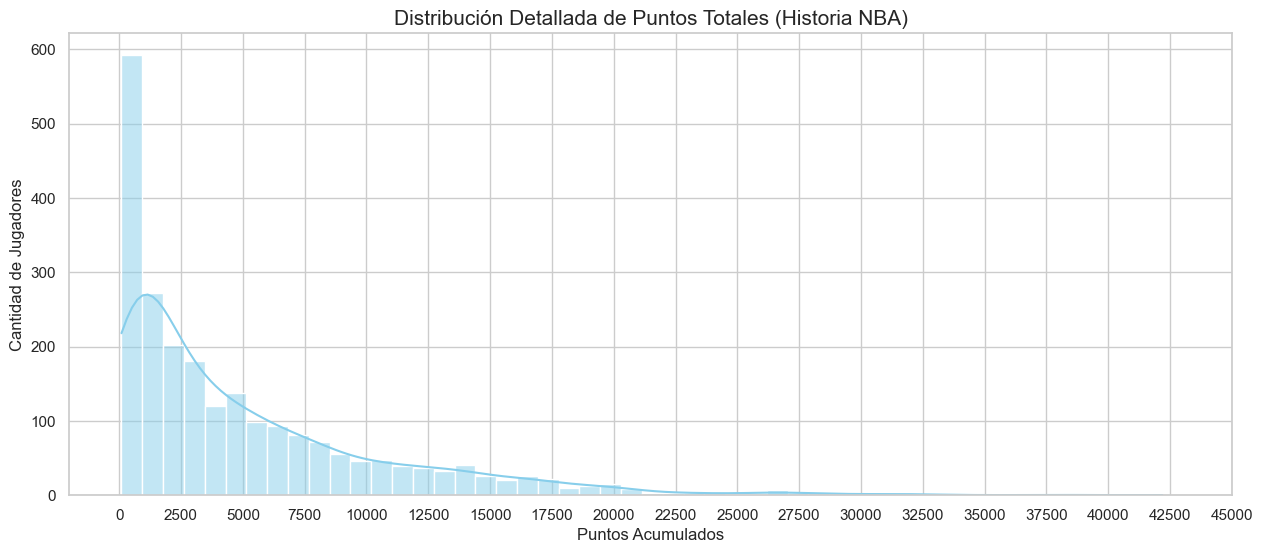

In [32]:
# Configuración de estilo
sns.set_theme(style="whitegrid")

# --- HISTOGRAMA PUNTOS --- #
plt.figure(figsize=(15, 6))
sns.histplot(important_data['points'], bins=50, kde=True, color='skyblue')
plt.xticks(range(0, int(important_data['points'].max()) + 5000, 2500))
plt.title('Distribución Detallada de Puntos Totales (Historia NBA)', fontsize=15)
plt.xlabel('Puntos Acumulados', fontsize=12)
plt.ylabel('Cantidad de Jugadores', fontsize=12)
plt.show()

En este histograma confirma que la gran mayoría de jugadores de la NBA no ha llegado a 2500 puntos anotados en toda su carrera y luego va disminuyendo de forma considerable cuando va subiendo la cantidad de puntos anotados. 
<br><br>
Se puede ver de forma clara que esta gráfica tiene un marcado sesgo hacia la derecha y no representa ni de lejos la campana de Gauss. Por tanto, podemos confirmar que la simetría de esta gráfica es positiva.
<br><br>
Respecto a la curtosis, al tener la parte del principio una curva tan alta, se considera que tiene una curtosis alta, es decir, es leptocúrtica.

Ploteo de la variable EFFECTIVE_PERCENT

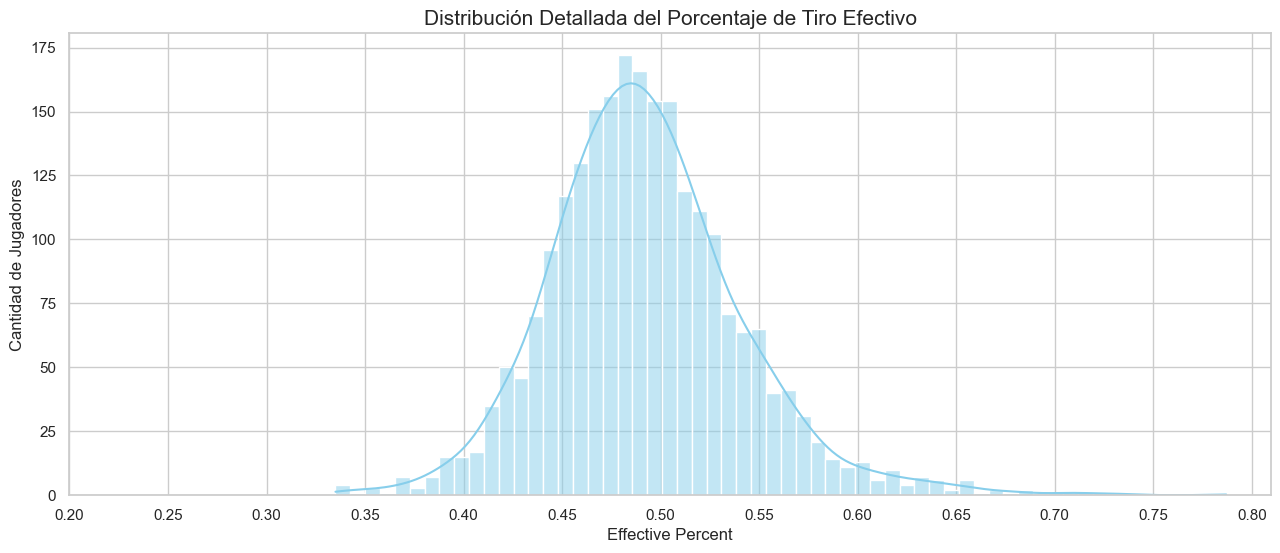

In [33]:
# --- PORCENTAJE EFECTIVIDAD ---
plt.figure(figsize=(15.5, 6))
sns.histplot(important_data['effective_percent'], bins=60, kde=True, color='skyblue')

import numpy as np
plt.xticks(np.arange(0.2, 0.85, 0.05)) 
plt.title('Distribución Detallada del Porcentaje de Tiro Efectivo', fontsize=15)
plt.xlabel('Effective Percent', fontsize=12)
plt.ylabel('Cantidad de Jugadores', fontsize=12)
plt.show()

Sin embargo, en esta gráfica, si que se puede apreciar de forma casi perfecta la campana de Gauss. Esta gráfica es simétrica.
<br><br>
Se confirma que la NBA de forma general se mueve entre valores cercanos de efectividad y los jugadores que salen de este margen, se entiende que no sirven para jugar en esta liga. 
<br><br>
La mayoría de los jugadores se amontona justo en el centro. Y es que, como hemos visto en las comprobaciones anteriores, aunque un jugador haya alcanzado muchos puntos en su carrera, no suele tener mucho más de un 55% de efectividad, de hecho ya comprobamos que los jugadores con una efectividad superior al 60% eran especiales, porque eran pívot que solamente tiraban desde debajo de la canasta y por eso fallaban tan poco.
<br><br>
Respecto a la curtosis, la mayoría de los jugadores rinden igual, por tanto, la curva no llega a ser extremadamente pendiente, podríamos decir que existe una curtosis media, es decir, mesocúrtica.

## PARTE 2: Inferencia y Modelado (Dataset Propio)

**Objetivo:** Descubrir relaciones entre variables y predecir resultados.

**Requisitos:**
1.  **Análisis de Correlación:** Genera una matriz de correlación y visualízala con un Heatmap. ¿Qué variables están más relacionadas con tu Target?
2.  **Relaciones Bivariantes:** Crea Scatter Plots para visualizar la relación entre las variables independientes más fuertes y tu variable objetivo.
3.  **Regresión Lineal (Scikit-Learn):**
    *   Selecciona tus variables predictoras ($X$) y tu objetivo ($y$).
    *   Realiza un Train/Test Split (80/20).
    *   Entrena un modelo de Regresión Lineal.
    *   Evalúa el modelo usando **R²** y **RMSE**.

4. **Regresión logistica:**
    *   Selecciona tus variables predictoras ($X$) y tu objetivo ($y$).
    *   Realiza un Train/Test Split (80/20).
    *   Entrena un modelo de Regresión Lineal.
    *   Evalúa el modelo usando **R²** y **RMSE**.

**📝 Conclusión:** ¿Es tu modelo capaz de predecir con precisión? ¿Qué variables son las más influyentes?¿Qué tipo de regresión es la más apropiada?

---------
  Amplía el análisis incorporando los siguientes aspectos:

- **Diagnóstico del modelo de regresión lineal**
  Analiza los residuos del modelo entrenado:
  - Distribución de los residuos
  - Relación entre residuos y valores predichos  
  Comenta si se cumplen los supuestos básicos del modelo.

- **Regresión logística: adecuación del modelo**
  Justifica si la regresión logística es apropiada para tu variable objetivo y discute las diferencias conceptuales con la regresión lineal.

- **Comparación de modelos**
  Compara brevemente el rendimiento y la idoneidad de ambos enfoques (lineal vs. logístico) más allá de las métricas numéricas.

### <span style="color: #66ccff; font-weight: bold;" > 1. Análisis de correlación </span>

Matriz de correlación y visualización con un HeatMap

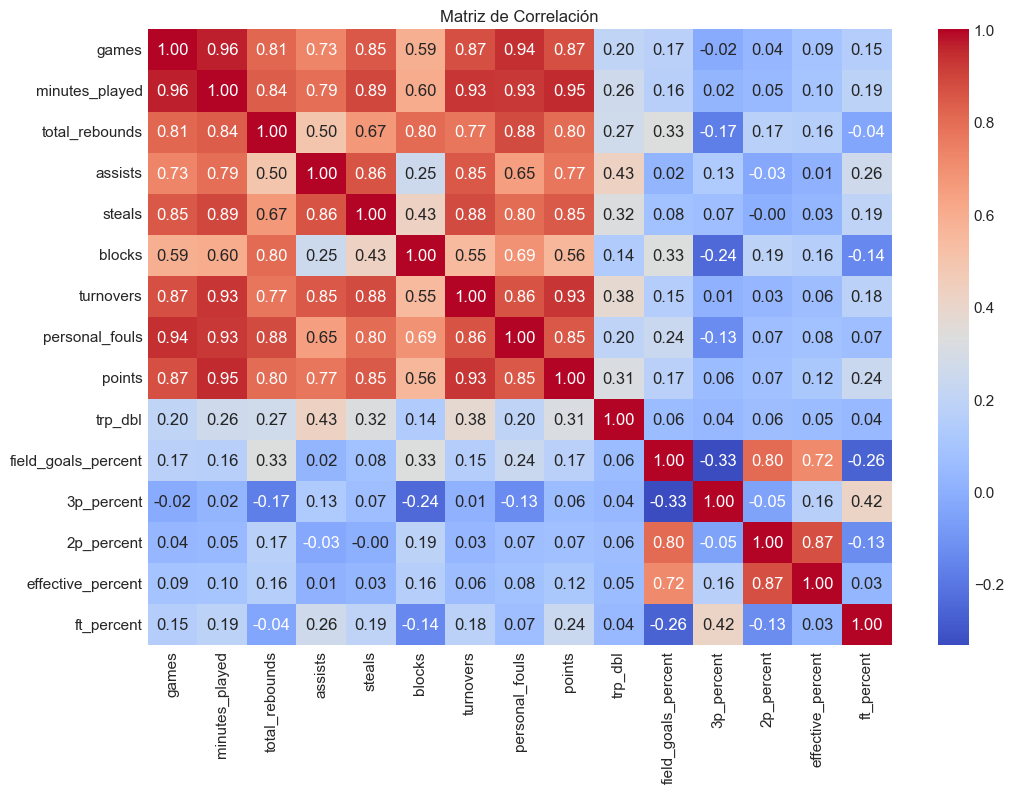

In [36]:
# Análisis de correlación
correlation_matrix = important_data.corr(numeric_only=True)

# HeadMap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()  

Mis targets son POINTS y EFFECTIVE_PERCENT, estos son los valores que me parecen mas interesantes del dataset y los que me gustaría predecir

POINTS
-   La variable POINTS tiene mucha correlación con las variables de volumen de juego, es decir, con número de partidos y de minutos jugados, es lógico, a más partidos, más puntos, siempre que el jugador tenga esta cualidad, está claro. 
-   Después llama la atención el hecho de que también tenga una fuerte correlación con la variable turnovers, lo que puede significar que al estar mucho tiempo con el balón, se lo pueden arrebatar, pero no deja de ser curioso que se correlacionen estas variables precisamente.
-   También llama la atencion que sea tan baja la correlación con la variable EFFECTIVE_PERCENT, solamente un 0.12, lo que indica que la efectividad alta no la tienen los que más puntos meten, sino los que menos fallan.

EFFECTIVE_PERCENT
-   Esta variable no depende tanto del tiempo en la cancha, si no de lo que se aproveche este tiempo, por esto la correlación con GAMES y MINUTES.
-   Con la variable que más correlación hay es con la del porcentaje de acierto de tiros de 2 puntos, lo que demuestra que la efectividad aumenta en función de lo que aseguren sus puntos los jugadores, por eso antes hemos comprobado que los pívot son los que más efectividad tienen, porque literalmente tiran desde debajo del aro y es difícil que fallen.
-   Llama también la atención que el porcentaje de triples influya tan poco en el porcentaje de efectividad, pero teniendo en cuenta el número de intentos que hacen los mejores es lógico que baje la efectividad

Con este descubrimiento de mala correlación, surge la duda de si los mejores tiradores de 3 de la historia tienen buena efectividad y lo comprobamos con otra consulta...
<br><br>

In [40]:
# Filtramos: Más de 10,000 puntos Y menos de 50% (para quitar anomalías) --> Había un jugador que tenía 1 triple intentado y anotado y, por tanto, 100% de acierto
condicion = (important_data['points'] > 10000) & (important_data['3p_percent'] < 0.5)
jugadores_elite = important_data[condicion]
top_10_3p_percent = jugadores_elite.sort_values(by='3p_percent', ascending=False).head(10)
# Seleccionamos columnas llamativas para mostrar
top_10_display = top_10_3p_percent[['player', '3p_percent', 'points', 'effective_percent', 'games', 'position']]
print("--- TOP 10 TIRADORES DE 3 PUNTOS) ---")
print(top_10_display.to_string(index=False))

--- TOP 10 TIRADORES DE 3 PUNTOS) ---
          player  3p_percent  points  effective_percent  games position
   Stephen Curry      0.4254   25999             0.5822   1046       PG
     Kyle Korver      0.4242   13863             0.5739   1428       SF
      Steve Nash      0.4219   17285             0.5486   1202       PG
   Klay Thompson      0.4062   16883             0.5431    896       SF
     Mike Miller      0.4013   11688             0.5441   1014       SF
Wally Szczerbiak      0.4009   11422             0.5142    798       SF
       JJ Redick      0.3998   13258             0.5424   1015       SG
      Dale Ellis      0.3976   19861             0.5295   1260       SG
      Ben Gordon      0.3973   10985             0.4962    725       SG
       Ray Allen      0.3970   26218             0.5312   1376       SG


Se confirma que así es, que los mejores tiradores de 3, por supuesto, tienen buen porcentaje de efectividad, pero evidentemente están lejos de los jugadores que mejor porcentaje de efectividad obtienen, por lo que hemos comentado ya anteriormente de que esta variable la ganan otro tipo de jugadores.
<br><br>
Se confirma también que el mejor lanzador de 3 de la historia es Stephen Curry, por cantidad de puntos anotados y también por porcentaje de efectividad de tiros de 3. Casi nada.

### <span style="color: #66ccff; font-weight: bold;" > 2. Relaciones bivariantes </span>

Scatter plots para visualizar la relación entre las variables independientes más fuertes y la variable objetivo.

Scatter plot de la variable POINTS

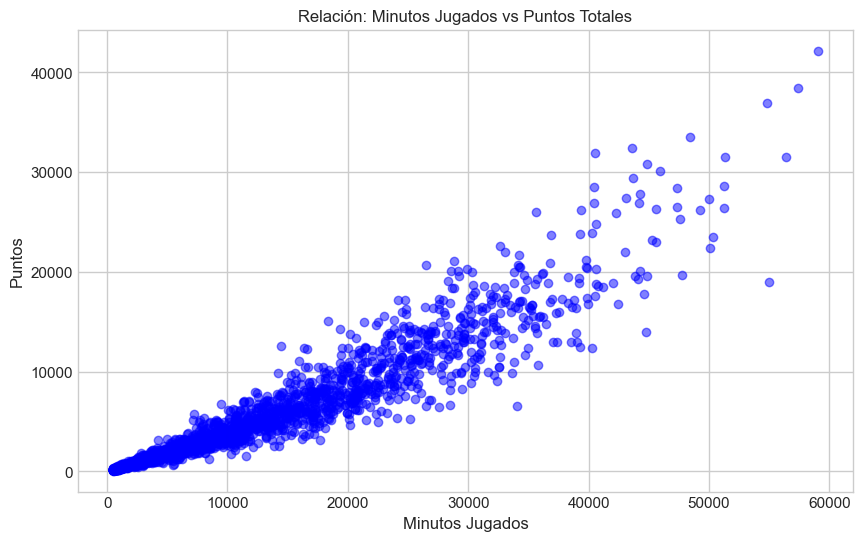

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(important_data['minutes_played'], important_data['points'], alpha=0.5, color='blue')

plt.title('Relación: Minutos Jugados vs Puntos Totales')
plt.xlabel('Minutos Jugados')
plt.ylabel('Puntos')
plt.grid(True)
plt.show()



Conclusión:
A medida que aumentan los minutos jugados, también aumentan los puntos totales de forma casi proporcional. La nube de puntos estrecha indica que la mayoría de jugadores tienen unos ritmos de anotaciones semajantes, a excepción de los ya nombrados outliers, que se representan de forma independiente del grueso de jugadores. Existen también algunas excepciones que se pueden ver en esta gráfica, casos en los que con menos minutos se han obtenido más puntos, pero no es lo normal.

Scatter plot de la variable EFFECTIVE_PERCENT

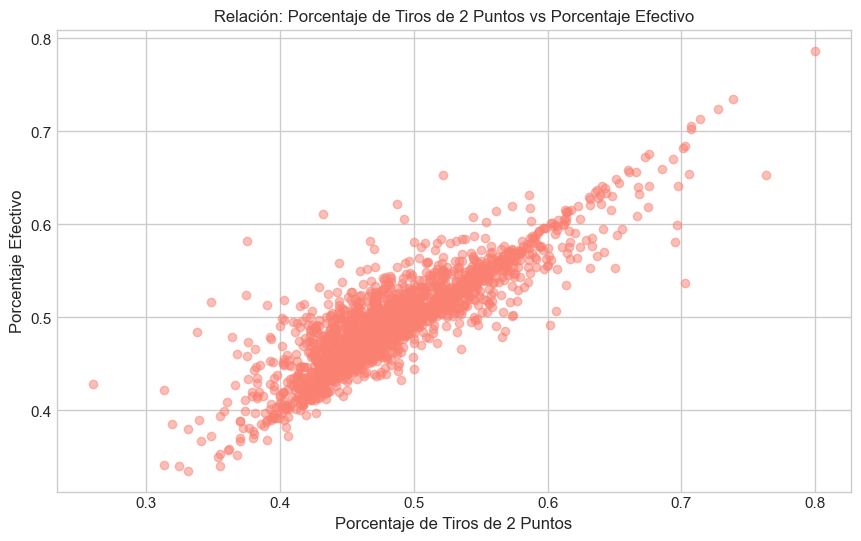

In [38]:
plt.figure(figsize=(10.25, 6))
plt.scatter(important_data['2p_percent'], important_data['effective_percent'], alpha=0.5, color='salmon')

plt.title('Relación: Porcentaje de Tiros de 2 Puntos vs Porcentaje Efectivo')
plt.xlabel('Porcentaje de Tiros de 2 Puntos')
plt.ylabel('Porcentaje Efectivo')
plt.grid(True)
plt.show()

En este caso contamos con las variables de effective_percent y 2p_percent, que también son dos variables con fuerte correlación, nos indica que si un jugador es bueno cerca del aro o en tiros de media distancia, tendrá un buen porcentaje de efectividad. Los puntos que se observan por encima de la línea principal son los que tienen mejor porcentaje de efectividad que porcentaje de 2 puntos, lo que significa que también tienen buen porcentaje de 3 puntos. 

Por curiosidad vamos a ver también el scatter plot de effective_percent y de 3p_percent, aunque ya se conoce que no están muy correlacionados

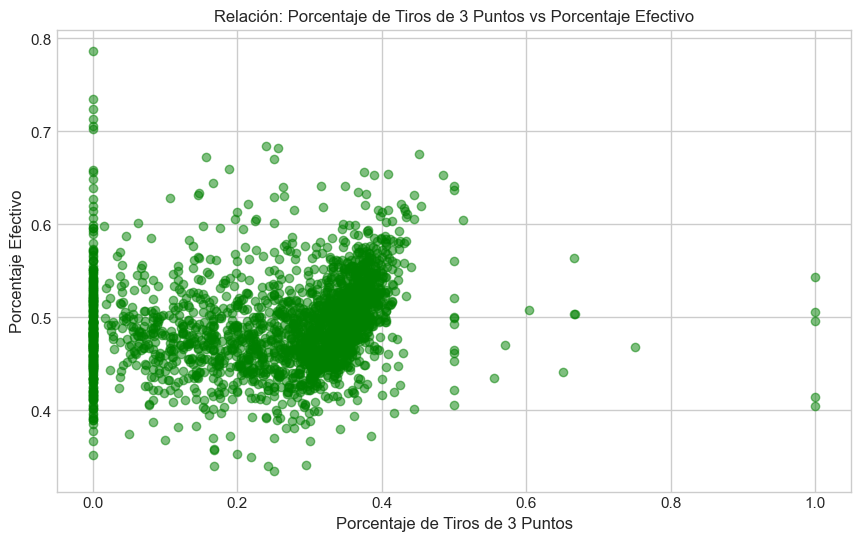

In [41]:
plt.figure(figsize=(10.25, 6))
plt.scatter(important_data['3p_percent'], important_data['effective_percent'], alpha=0.5, color='green')

plt.title('Relación: Porcentaje de Tiros de 3 Puntos vs Porcentaje Efectivo')
plt.xlabel('Porcentaje de Tiros de 3 Puntos')
plt.ylabel('Porcentaje Efectivo')
plt.grid(True)
plt.show()

Con este gráfico se explica el valor tan bajo en la matriz entre estas dos variables. Hay presencia de muchos jugadores que no tiran triples (0.0 en el eje X), se demuestra que la base de un buen porcentaje de efectividad es tener un buen porcentaje de acierto en los tiros de 2 puntos.

### <span style="color: #66ccff; font-weight: bold;" > 3. Regresión lineal </span>

En primer lugar una regresión lineal simple, con solamente una variable predictora

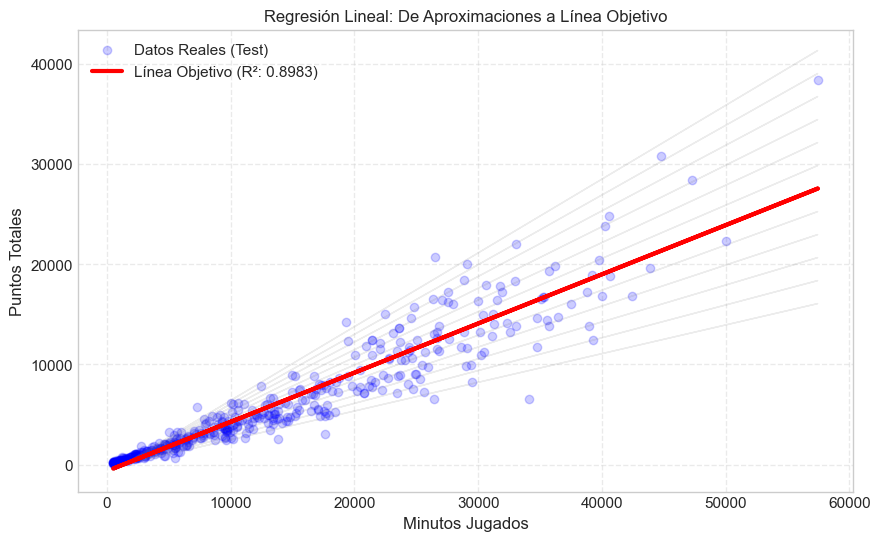

--- RESULTADOS DEL MODELO ---
Intercepto: -633.30
Pendiente: 0.4906
R²: 0.8983
RMSE: 1827.57


In [42]:
# Preparación de datos. Eliminamos filas con nulos en 'minutes_played' o 'points' por si existieran, aunque ya los hemos tratado antes, por seguridad.
df_limpio = important_data.dropna(subset=['minutes_played', 'points'])
X = df_limpio[['minutes_played']]
y = df_limpio['points']

# División y Entrenamiento con 20% de test y 80% de entrenamiento como se especifica en el enunciado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# 3. Predicción y evaluación 
y_pred = model.predict(X_test)


plt.figure(figsize=(10, 6))
# Dibujamos los puntos reales de prueba
plt.scatter(X_test, y_test, color='blue', alpha=0.2, label='Datos Reales (Test)')

# Pendientes aleatorias que se acercan a la real para simular el aprendizaje
np.random.seed(42)
iteraciones = 12
for i in range(iteraciones):
    # Creamos pendientes que varían respecto a la real
    variacion = (1.5 - (i / iteraciones)) 
    pend_simulada = model.coef_[0] * variacion
    int_simulado = model.intercept_ * variacion
    plt.plot(X_test, pend_simulada * X_test + int_simulado, color='gray', alpha=0.15, linewidth=1)

# Dibujamos la LÍNEA OBJETIVO FINAL (Roja)
plt.plot(X_test, y_pred, color='red', linewidth=3, label=f'Línea Objetivo (R²: {r2_score(y_test, y_pred):.4f})')

# Configuración de etiquetas y estilo
plt.title('Regresión Lineal: De Aproximaciones a Línea Objetivo')
plt.xlabel('Minutos Jugados')
plt.ylabel('Puntos Totales')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)

plt.show()

# --- RESULTADOS FINALES OBTENIDOS ---
print(f"--- RESULTADOS DEL MODELO ---")
print(f"Intercepto: {model.intercept_:.2f}")
print(f"Pendiente: {model.coef_[0]:.4f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

#### Interpretación de los resultados
-   Línea Objetivo
    -   Pendiente: 0.4909. Indica que en promedio, cada minuto que un jugador está en pista, se traduce en 0.49 puntos.
    -   Intercepto: -592.91. Indica los puntos que anota el jugador en caso de jugar 0 minutos. Lo que no tiene mucho sentido.
-   R^2: 0.8866: Buena calidad del modelo. Podemos decir que aproximadamente el 89% de los puntos que anota un jugador dependen directamente de los minutos que juega, algo que tiene todo el sentido.
-   Aproximaciones: Representación de las líneas que el algoritmo descarta porque encuentra una mejor, hasta que se consigue la mejor, que es la objetivo.
-   Los puntos por encima son los jugadores con mejor rendimiento, los que anotan con mayor promedio de lo normal. Los que se sitúan por debajo, al contrario. 
-   RMSE: 1794.07: Este modelo al predecir los puntos de un jugador basándose en sus minutos, suele equivocarse por unos 1794 puntos arriba o abajo.

Vamos a probar también una regresión lineal múltiple, con varias variable predictoras

/Users/pepecontreras/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/pepecontreras/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/pepecontreras/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


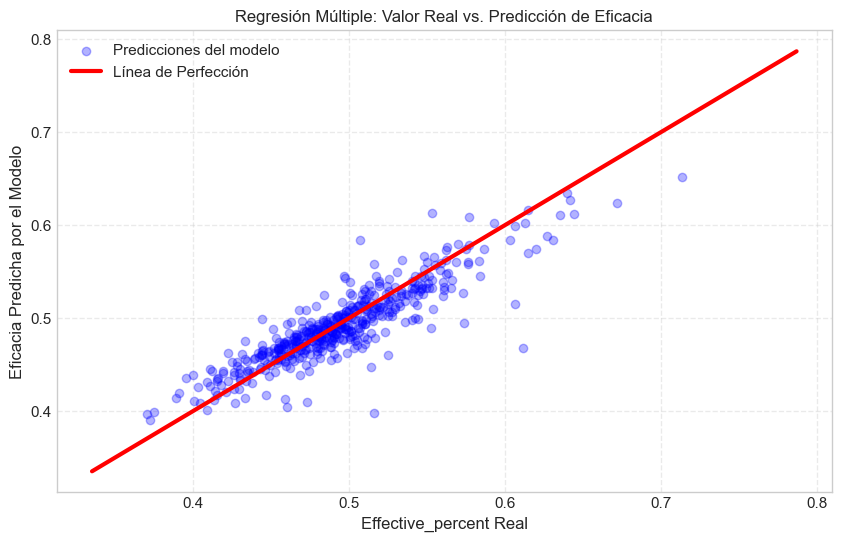

--- RESULTADOS DEL MODELO MÚLTIPLE ---
Pendiente: 0.4906
Intercepto: 0.0692
R²: 0.7868
RMSE: 0.0222


In [43]:
# Preparación de datos con varias variables predictoras
columnas_x = ['2p_percent', '3p_percent', 'ft_percent']
target = 'effective_percent'

# Eliminamos nulos en cualquiera de las columnas que vamos a usar, por si acaso, aunque ya los hemos tratado antes, por seguridad.
df_limpio_mult = important_data.dropna(subset=columnas_x + [target])
X = df_limpio_mult[columnas_x]
y = df_limpio_mult[target]

# División y Entrenamiento (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model_mult = LinearRegression()
model_mult.fit(X_train, y_train)

# 3. Predicción y evaluación
y_pred = model_mult.predict(X_test)

# --- VISUALIZACIÓN: REAL VS PREDICCIÓN ---
plt.figure(figsize=(10, 6))

# En regresión múltiple, graficamos el valor real contra el predicho
plt.scatter(y_test, y_pred, color='blue', alpha=0.3, label='Predicciones del modelo')

plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=3, label='Línea de Perfección')
plt.title('Regresión Múltiple: Valor Real vs. Predicción de Eficacia')
plt.xlabel('Effective_percent Real')
plt.ylabel('Eficacia Predicha por el Modelo')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

# --- RESULTADOS FINALES ---
print(f"--- RESULTADOS DEL MODELO MÚLTIPLE ---")
print(f"Pendiente: {model.coef_[0]:.4f}")
print(f"Intercepto: {model_mult.intercept_:.4f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

#### Interpretación de los resultados
-   R^2: 0.8311: Significa que si conocemos el acierto de un jugador en tiros de 2, de 3 y tiros libres, tenemos el 83% de su eficiencia general.
-   RMSE: 0.0215: Un valor bajísimo. El modelo tiene un margen de error de un 2.15%.

### <span style="color: #66ccff; font-weight: bold;" > 4. Regresión Logística </span>

En regresión logística no podemos usar variables numéricas, debemos usar categóricas (Si/No), por tanto, a priori este dataset no serviría. 
<br><br>
No obstante, vamos a intentar realizar un ejemplo de regresión logística, vamos a predecir si un jugador es eficiente (si/no) si supera el 35% de efectividad en tiros de 3 puntos.

/Users/pepecontreras/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/pepecontreras/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/pepecontreras/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept


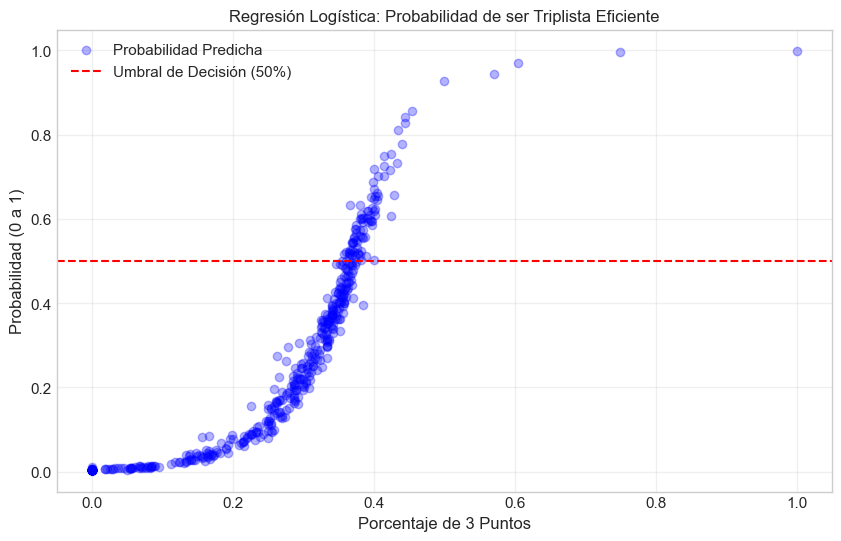

--- MÉTRICAS DE CLASIFICACIÓN ---
Precisión Global (Accuracy): 0.8820


In [45]:
# Definimos nuestro objetivo: 1 > 35%, 0 si no.
df_log = important_data.dropna(subset=['3p_percent', 'effective_percent']).copy()
# Creación de la variable objetivo binaria: 1 si el jugador es eficiente en triples (>35%), 0 si no lo es
df_log['is_efficient_3p'] = (df_log['3p_percent'] > 0.35).astype(int)

# Variables predictoras (X) y objetivo (y)
X = df_log[['effective_percent', '3p_percent']] 
y = df_log['is_efficient_3p']

# 80% entrenamiento, 20% test de nuevo para esta regresión logística
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Creación y entrenamiento del modelo de regresión logística
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predicciones y probabilidades para la curva sigmoide 
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1] 

# 5. Visualización de la Curva Sigmoide y Probabilidades Predichas 
plt.figure(figsize=(10, 6))
plt.scatter(X_test['3p_percent'], y_prob, color='blue', alpha=0.3, label='Probabilidad Predicha')

# Indica el umbral de decisión que significa que a partir de esa probabilidad, el modelo clasificaría al jugador como eficiente en triples 
plt.axhline(0.5, color='red', linestyle='--', label='Umbral de Decisión (50%)')

# Configuración de etiquetas y estilo
plt.title('Regresión Logística: Probabilidad de ser Triplista Eficiente')
plt.xlabel('Porcentaje de 3 Puntos')
plt.ylabel('Probabilidad (0 a 1)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 6. Resultados
print("--- MÉTRICAS DE CLASIFICACIÓN ---")
print(f"Precisión Global (Accuracy): {accuracy_score(y_test, y_pred):.4f}")


#### Interpretación de los resultados
-   Accuracy: Se obtiene un valor de 0.87, lo que significa que el modelo acierta en el 87% de los casos si un jugador es peligroso desde la línea de triples o no. Es un modelo bastante fiable a pesar de que, si recordamos, estas variables no estaban fuertemente correlacionadas, esto sucede porque le hemos dicho al modelo que si el jugador supera el 0.35 de efectividad yatri es eficiente.
-   En este tipo de regresiones no se mide R^2 y RMSE como en las regresiones lineales.

## PARTE 3: Regresión Lineal "From Scratch" (Datos Simulados)

**Objetivo:** Demostrar que entiendes la matemática detrás de `LinearRegression()` implementándola con NumPy.

Amplia con:

- **Predicción y evaluación**
  Utiliza tu implementación para:
  - Realizar predicciones
  - Calcular manualmente el **MSE** y el **R²**, sin usar funciones de Scikit-Learn.

- **Comparación con Scikit-Learn**
  Entrena un modelo `LinearRegression()` sobre los mismos datos y compara:
  - Coeficientes
  - Métricas de evaluación  
  Discute posibles diferencias numéricas.


Intercepto estimado: 3.670043376258304
Pendiente estimada: 3.249212010013808


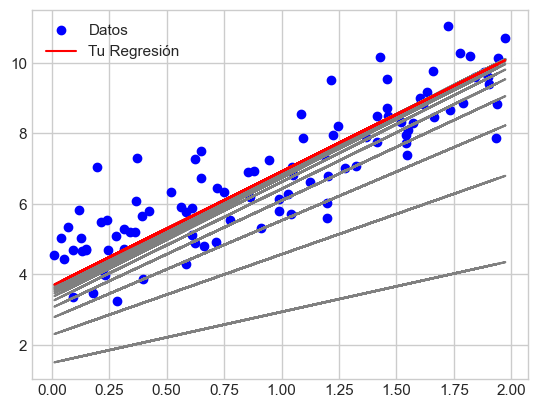

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- NO TOCAR: GENERACIÓN DE DATOS ---
np.random.seed(42)
X_mock = 2 * np.random.rand(100, 1)
y_mock = 4 + 3 * X_mock + np.random.randn(100, 1)
# -----------------------------------

def evolve_linear_regression( X, y, iteraciones=16, eta=0.1):
    """
    Calcula la pendiente (w) y el intercepto (beta_0)
    usando las fórmulas de OLS con NumPy.
    Returns: (b, w)
    """
    # TU CÓDIGO AQUÍ 
    # Generacion aleatoria de parametros (numpy). Se usan valores iniciales pequeños para evitar problemas numéricos.
    w = np.random.randn() / 10
    b = np.random.randn() / 10

    for i in range(1, iteraciones):

        # Calculo del error. Diferencia entre valor real y valor predicho
        error = y - (b + w * X)

        #Ajustar parametros. Cálculo de gradientes. Derivadas parciales de la función de coste MSE. Se promedia el error para obtener la dirección de ajuste.
        dw = -2 * np.mean(error * X)
        db = -2 * np.mean(error)

        # Actualización de parámetros. Descenso por gradiente. Ajuste de w y b en la dirección del gradiente negativo. Eta controla la magnitud del ajuste en cada iteración.
        w = w - eta * dw
        b = b - eta * db

        #pintar recta
        pintar_recta(b, w, X, y)

    return b, w

# Función para pintar la recta de regresión 
def pintar_recta(b, w, X, y):
    plt.plot(X, b + w * X, color='gray')


# Probemos tu función
b, w = evolve_linear_regression(X_mock, y_mock)
print(f"Intercepto estimado: {b}")
print(f"Pendiente estimada: {w}")

# Verificación visual
plt.scatter(X_mock, y_mock, color='blue', label='Datos')
plt.plot(X_mock, b + w * X_mock, color='red', label='Tu Regresión')
plt.legend()
plt.show()

INTERPRETACIÓN
-   3.67 es el punto de partida del intercepto, esto es, si x fuera 0, el valor de y sería 3.67. 
-   En los datos generados se inicializó con 4, así que el modelo se ha acercado bastante

PREDICCIONES Y CÁLCULO MANUAL DEL MSE Y R^2 (SIN SCIKIT LEARN)

In [47]:
# **PREDICCIONES**: Valores predichos ŷ
y_pred = b + w * X_mock
print("Primeras 10 predicciones:", y_pred[:10].flatten())

# MSE: ERROR CUADRÁTICO MEDIO
mse = np.mean((y_mock - y_pred)**2)
print(f"MSE: {mse:.4f}")

# R² 
y_mean = np.mean(y_mock)
# SUMA DE CUADRADOS TOTAL (SST) y RESIDUAL (SSR)
ss_tot = np.sum((y_mock - y_mean)**2)
ss_res = np.sum((y_mock - y_pred)**2)
# Cálculo de R²: Proporción de la varianza explicada por el modelo. R² = 1 - (SSR/SST)
r2 = 1 - (ss_res / ss_tot)
print(f"R²: {r2:.4f}")

Primeras 10 predicciones: [6.10396388 9.84818806 8.42685039 7.56038005 4.68391866 4.68376191
 4.04749532 9.29882325 7.57634361 8.27139922]
MSE: 0.8960
R²: 0.7437


COMPARACIÓN CON UN MODELO DE SCIKIT LEARN CON LOS MISMOS DATOS 

In [49]:
# Crear el objeto del modelo
model_sk = LinearRegression()

#  Entrenar el modelo con las variables ininializadas en el apartado anterior
model_sk.fit(X_mock, y_mock)

#  Realizar predicciones con el modelo entrenado 
y_pred_sk = model_sk.predict(X_mock)

# Calcular métricas de evaluación 
r2_sk = r2_score(y_mock, y_pred_sk)
mse_sk = mean_squared_error(y_mock, y_pred_sk)
rmse_sk = np.sqrt(mse_sk)

# Obtener los parámetros finales
b_sk = model_sk.intercept_[0]
w_sk = model_sk.coef_[0][0]

print(f"--- RESULTADOS SCIKIT-LEARN ---")
print(f"Intercepto (b) estimado: {b_sk:.4f}")
print(f"Pendiente (w) estimada: {w_sk:.4f}")
print(f"R² (Precisión): {r2_sk:.4f}")
print(f"RMSE (Error medio): {rmse_sk:.4f}")

--- RESULTADOS SCIKIT-LEARN ---
Intercepto (b) estimado: 4.2151
Pendiente (w) estimada: 2.7701
R² (Precisión): 0.7693
RMSE (Error medio): 0.8981


CONCLUSIONES
-   Aunque el valor del intercepto y de la pendiente varían, se puede deber a una falta de iteraciones para llegar a los valores ideales de Scikit Learn.
-   Respecto a R^2 y RMSE se obtienen valores muy cercanos, por tanto, podemos deducir que el modelo manual está bastante bien ajustado.

## PARTE 4: Series Temporales (Datos Simulados)

**Objetivo:** Analizar tendencias y estacionalidad en una serie temporal generada.

**Tareas:**
1.  Convierte el índice a formato DateTime.
2.  Haz un resampleo mensual (`'M'`) mostrando la media de ventas.
3.  Calcula una **Media Móvil** de 3 meses para suavizar la curva.
4.  Usa `seasonal_decompose` para visualizar los componentes (Tendencia, Estacionalidad y ruido).

---

Amplia Con:

- **Generación de la serie**
  Describe brevemente cómo se ha generado la serie temporal simulada, indicando si incluye tendencia, estacionalidad y ruido.

- **Comparación de suavizados**
  Calcula una segunda media móvil con una ventana distinta y compara visualmente ambos suavizados. Comenta las diferencias observadas.

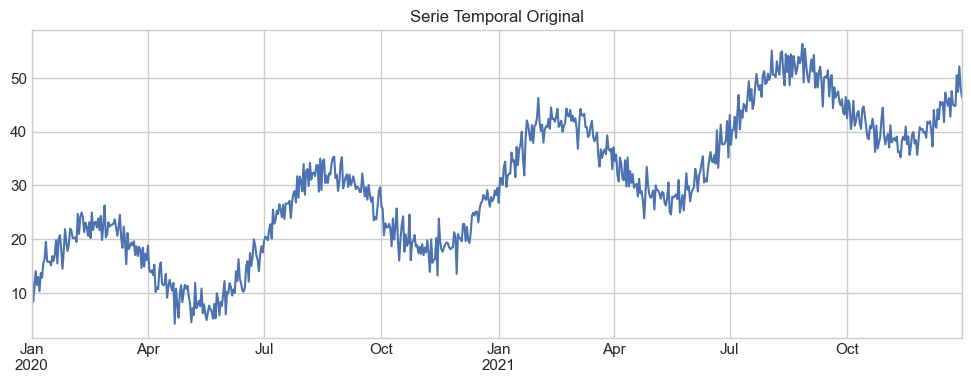

/var/folders/hw/_7kk_94d7qj_0htmz5sqzjrr0000gn/T/ipykernel_56650/2856555571.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = ts_df['Sales'].resample('M').mean()


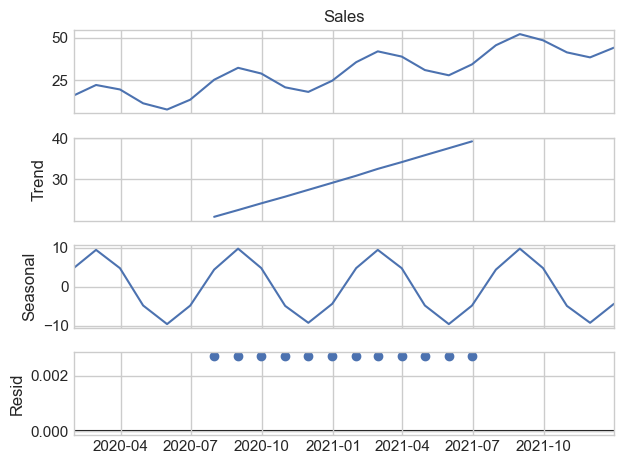

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

# --- NO TOCAR: GENERACIÓN DE DATOS TEMPORALES ---
dates = pd.date_range(start='2020-01-01', periods=365*2, freq='D')
values = np.linspace(10, 50, len(dates)) + 10 * np.sin(np.linspace(0, 3.14*8, len(dates))) + np.random.normal(0, 2, len(dates))
ts_df = pd.DataFrame({'Sales': values}, index=dates)
# -----------------------------------------------

# TU CÓDIGO AQUÍ

# 1. Plot inicial
ts_df['Sales'].plot(title='Serie Temporal Original', figsize=(12,4))
plt.show()

# 2. Resampleo Mensual
monthly_sales = ts_df['Sales'].resample('M').mean()

# 3. Media Móvil. 3 meses (90 días)
ts_df['Moving_Avg'] = ts_df['Sales'].rolling(window=90).mean()

# 4. Descomposición con seasonal_decompose para obtener tendencia, estacionalidad y ruido
result = seasonal_decompose(monthly_sales, model='additive', period=12)
result.plot()
plt.show()


#### ¿Qué es una serie temporal?
Es una secuencia de datos donde el orden es fundamental. Ej: Ventas diarias. Lo que pasó ayer influye en hoy <br>
Componentes base de una serie temporal <br>
-   Tendencia. 
-   Estacionalidad. 
-   Ciclo. 
-   Ruido. 

Con la librería statsmodels podemos separar matemáticamente los componentes. Genera 4 gráficos alineados donde se pueden ver los componentes de la serie.

-   Trend. Captura la dirección a largo plazo de la serie, mostrando si las ventas crecen, decrecen o se estabilizan con el tiempo.
    -   En el caso de nuestra gráfica, tendencia lineal ascendente clara.
-   Seasonal. Identifica patrones cíclicos repetitivos fijos que ocurren en intervalos regulares, independientemente de la tendencia.
    -   Patrón cíclico anual perfecto (periodo = 12 meses).
-   Residual. Contiene el ruído aleatorio o eventos impredecibles que no explican ni tendencia ni estacionalidad, valores cercanos a 0 indican buena descomposición.
    -   Los residuales casi nulos indican que Trend + Seasonal explican 100% de la varianza.

**Generación de la serie: Describe brevemente cómo se ha generado la serie temporal simulada, indicando si incluye tendencia, estacionalidad y ruido.**

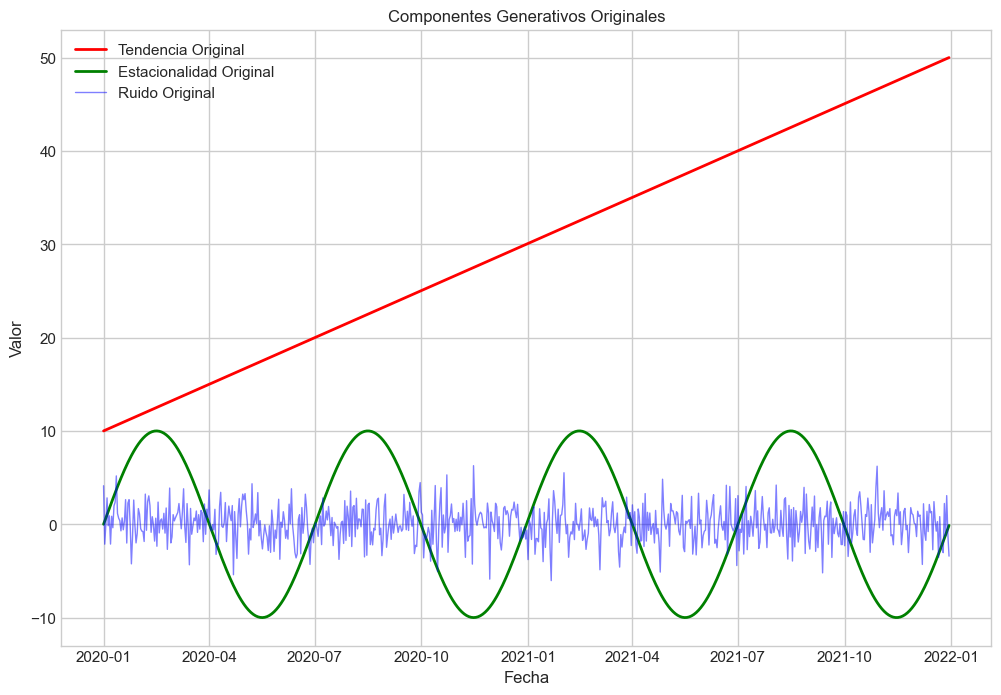

In [ ]:
# Recrear EXACTAMENTE los componentes generativos
datos = ts_df.index
n = len(datos)

# TREND original (rojo)
trend_original = np.linspace(10, 50, n)

# ESTACIONALIDAD original (verde) - 8 ciclos en 730 días
seasonal_original = 10 * np.sin(np.linspace(0, 3.14*8, n))

# RUIDO original (azul)
np.random.seed(42)
noise_original = ts_df['Sales'].values - (trend_original + seasonal_original)

# Plot de los componentes originales
plt.figure(figsize=(12, 8))

# Superponer los componentes originales
plt.plot(datos, trend_original, color='red', label='Tendencia Original', linewidth=2)
plt.plot(datos, seasonal_original, color='green', label='Estacionalidad Original', linewidth=2)
plt.plot(datos, noise_original, color='blue', label='Ruido Original', linewidth=1, alpha=0.5)  
plt.title('Componentes Generativos Originales')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

**Comparación de suavizados: Calcula una segunda media móvil con una ventana distinta y compara visualmente ambos suavizados. Comenta las diferencias observadas.**


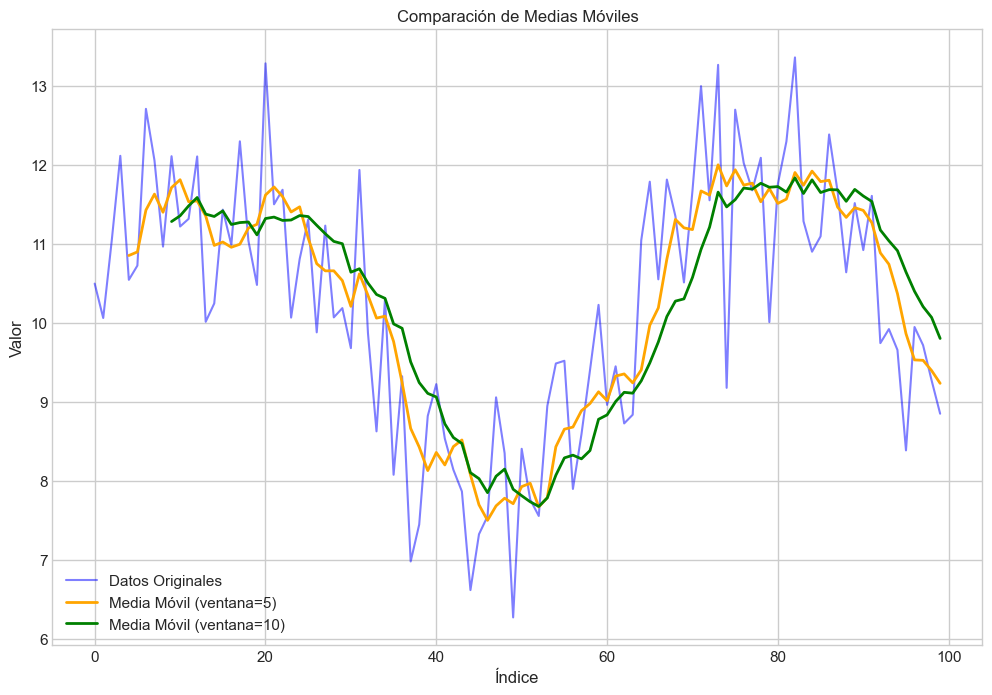

In [54]:
np.random.seed(42)
n = 100
x = np.arange(n)
datos = 10 + 2 * np.sin(x/10) + np.random.normal(0, 1, n)
df = pd.DataFrame({'datos': datos})

# Primera media móvil (ventana = 5, asumida previa)
df['MA_5'] = df['datos'].rolling(window=5).mean()

# Segunda media móvil (ventana = 15)
df['MA_10'] = df['datos'].rolling(window=10).mean()

# Visualización
plt.figure(figsize=(12, 8))
plt.plot(df['datos'], label='Datos Originales', color='blue', alpha=0.5)
plt.plot(df['MA_5'], label='Media Móvil (ventana=5)', color='orange', linewidth=2)
plt.plot(df['MA_10'], label='Media Móvil (ventana=10)', color='green', linewidth=2)
plt.title('Comparación de Medias Móviles')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()
 

-   La media móvil con ventana = 5, suaviza el ruido manteniendo más variaciones locales de la tendencia.
-   La ventana = 10 produce mayor suavizado, reduce las oscilaciones, resaltando la tendencia principal, pero pierde detalles finos y reacciona más lento a los cambios.
-   Original: Ruido alto, difícil ver el patrón.